In [1]:
from glob import glob
import numpy as np
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
import scipy as sp

## Read in the data
first starting with the parameters files

In [2]:
run_dirs = sorted(glob('runs/runs/*temp=*73*blend*'))
run_dirs

['runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-004fd520',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-04e40f19',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-0973f35b',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-162eecad',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-192f90fa',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-19baed52',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-19c77947',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-2e6bb75f',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-2f6938de',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-3d3d2bdd',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-5300ea84',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-c2cd0af0',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-d5bf3d52',
 'runs/runs/si-vacancy-2x2x2-temp=1473.0-method=lda-blend=0-fcb7951f',
 'runs

In [3]:
params = []
for d in run_dirs:
    try:
        params.append(json.loads((Path(d)/'params.json').read_text()))
    except: 
        print(f'couldnt find {d}/params.json; skipping')
        continue
    params[-1]['dir'] = d
    params[-1]['hash'] = d.split('-')[-1]
params = pd.DataFrame(params)
params.head()
#params = params[params['steps'] == 20_000]

,file,starting_strc,temperature,timestep,calculator,ensemble,temp_tau,stress_tau,steps,seed,...,target_error,error_history,retrain_freq,min_target_frac,n_blending_steps,cascade_commit,my_commit,start_time,dir,hash
0,None,/home/mtynes/cascade/0_setup/initial-geometrie...,1473.0,1,lda,npt,25,25.0,50000,0,...,1.000000e-12,8,10000000000,1.0,0,884fa037daca2f12f3c528117ba8a386033dfd71,884fa037daca2f12f3c528117ba8a386033dfd71,2024-08-26T12:02:15.292299,runs/runs/si-vacancy-2x2x2-temp=1473.0-method=...,004fd520
1,None,/home/mtynes/cascade/0_setup/initial-geometrie...,1473.0,1,lda,npt,25,25.0,20000,0,...,4.500000e-01,8,10000000000,1.0,0,884fa037daca2f12f3c528117ba8a386033dfd71,884fa037daca2f12f3c528117ba8a386033dfd71,2024-08-29T10:35:52.150632,runs/runs/si-vacancy-2x2x2-temp=1473.0-method=...,04e40f19
2,None,/home/mtynes/cascade/0_setup/initial-geometrie...,1473.0,1,lda,npt,25,25.0,50000,4,...,1.000000e-12,8,10000000000,1.0,0,884fa037daca2f12f3c528117ba8a386033dfd71,884fa037daca2f12f3c528117ba8a386033dfd71,2024-08-26T12:02:15.309745,runs/runs/si-vacancy-2x2x2-temp=1473.0-method=...,0973f35b
3,None,/home/mtynes/cascade/0_setup/initial-geometrie...,1473.0,1,lda,npt,25,25.0,50000,7,...,1.000000e-12,8,10000000000,1.0,0,884fa037daca2f12f3c528117ba8a386033dfd71,884fa037daca2f12f3c528117ba8a386033dfd71,2024-08-26T12:02:15.296250,runs/runs/si-vacancy-2x2x2-temp=1473.0-method=...,162eecad
4,None,/home/mtynes/cascade/0_setup/initial-geometrie...,1473.0,1,lda,npt,25,25.0,50000,5,...,1.000000e-12,8,10000000000,1.0,0,884fa037daca2f12f3c528117ba8a386033dfd71,884fa037daca2f12f3c528117ba8a386033dfd71,2024-08-26T12:02:15.304867,runs/runs/si-vacancy-2x2x2-temp=1473.0-method=...,192f90fa


Then read in the diffusion coefficient we saved to disk

In [4]:
d = []
for i, row in params.iterrows():
    d.append(np.load(Path(row['dir'])/'msd.npz')['d'])
params['d'] = d

In [5]:
params.describe()

,temperature,timestep,temp_tau,stress_tau,steps,seed,bulk_modulus,ensemble_size,training_epochs,training_batch_size,training_max_size,training_recency_bias,target_error,error_history,retrain_freq,min_target_frac,n_blending_steps
count,78.000000,78.0,78.0,78.0,78.000000,78.000000,78.0,78.0,78.0,78.0,70.0,78.0,7.800000e+01,78.0,7.800000e+01,78.000000,78.000000
mean,1742.230769,1.0,25.0,25.0,23076.923077,0.807692,98.0,2.0,32.0,32.0,512.0,1.0,5.653846e-01,8.0,2.820513e+09,0.353846,1.794872
std,211.554354,0.0,0.0,0.0,9160.572248,1.269602,0.0,0.0,0.0,0.0,0.0,0.0,2.849365e-01,0.0,4.529108e+09,0.407620,2.414023
min,1473.000000,1.0,25.0,25.0,20000.000000,0.000000,98.0,2.0,32.0,32.0,512.0,1.0,1.000000e-12,8.0,2.560000e+02,0.100000,0.000000
25%,1573.000000,1.0,25.0,25.0,20000.000000,0.000000,98.0,2.0,32.0,32.0,512.0,1.0,4.500000e-01,8.0,2.560000e+02,0.100000,0.000000
50%,1773.000000,1.0,25.0,25.0,20000.000000,1.000000,98.0,2.0,32.0,32.0,512.0,1.0,4.500000e-01,8.0,2.560000e+02,0.100000,0.000000
75%,1948.000000,1.0,25.0,25.0,20000.000000,1.000000,98.0,2.0,32.0,32.0,512.0,1.0,9.000000e-01,8.0,1.000000e+10,1.000000,5.000000
max,2073.000000,1.0,25.0,25.0,50000.000000,7.000000,98.0,2.0,32.0,32.0,512.0,1.0,9.000000e-01,8.0,1.000000e+10,1.000000,5.000000


## Note: some of the DFT-only runs are longer
These are the low temperature ones. There are 8 of them at 1473K and they're run for 50,000 steps instead of 2 for 20,000 steps. 

In [6]:
params[['target_error', 'retrain_freq', 'min_target_frac', 'n_blending_steps']].value_counts()

target_error  retrain_freq  min_target_frac  n_blending_steps
4.500000e-01  256           0.1              0                   14
                                             5                   14
              10000000000   1.0              0                   14
9.000000e-01  256           0.1              0                   14
                                             5                   14
1.000000e-12  10000000000   1.0              0                    8
Name: count, dtype: int64

In [7]:
params.query('target_error == 1e-12')[['temperature', 'steps', 'seed']]

,temperature,steps,seed
0,1473.0,50000,0
2,1473.0,50000,4
3,1473.0,50000,7
4,1473.0,50000,5
8,1473.0,50000,6
9,1473.0,50000,1
11,1473.0,50000,3
13,1473.0,50000,2


Compute inverse temperature and split out the DFT baselines

In [8]:
params['1/T'] = 1/params['temperature']

In [9]:
dft_only = params.query('min_target_frac == 1')
ml_only  = params.query('min_target_frac < 1')

In [10]:
import warnings
warnings.filterwarnings('once')

## Make the arrhenius plots and compute the $E_a$

/home/mike/miniconda3/envs/cascade/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mike/miniconda3/envs/cascade/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2989628/2693193250.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_only['logd'] = np.log10(dft_only['d'].astype(float))
/home/mike/miniconda3/envs/cascade/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mike/minicon

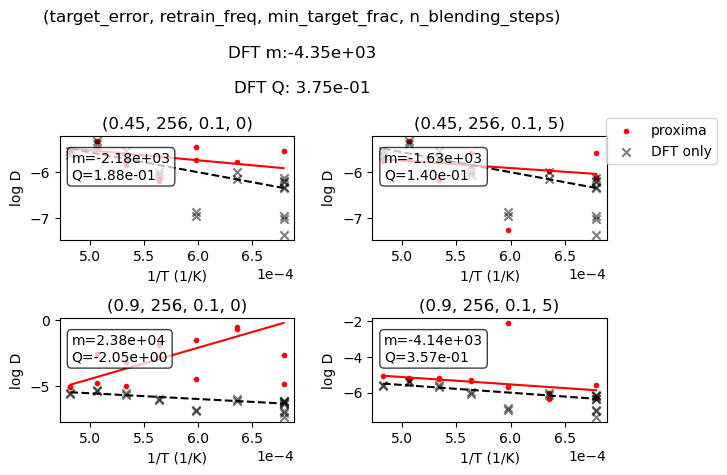

In [11]:
fig, axs = plt.subplots(2,2)
axs = np.ravel(axs)
group_vars = ['target_error', 'retrain_freq', 'min_target_frac', 'n_blending_steps']
for i, (g, df) in enumerate(ml_only.groupby(
    group_vars
)): 
    plt.sca(axs[i])
    df['logd'] = np.log10(df['d'].astype(float))
    df = df.dropna(axis=0, subset='logd')
    plt.scatter(df['1/T'], df['logd'], color='red', marker='.', label='proxima')
    #m, b = np.polyfit(df['1/T'], df['d'].astype(float), deg=1)
    m, b = sp.stats.siegelslopes(df['logd'].astype(float), df['1/T'])
    ax = axs[i]
    conv = -8.617e-5 
    Q = m*conv
    ax.text(0.05, 0.85, f'{m=:0.2e}\n{Q=:0.2e}', transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', alpha = 0.75, facecolor='white'))
    x = np.linspace(df['1/T'].min(), df['1/T'].max())
    plt.plot(x, m*x + b, color='red')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    plt.ylabel('log D')
    plt.xlabel('1/T (1/K)')
    dft_only['logd'] = np.log10(dft_only['d'].astype(float))
    _df = dft_only.dropna(axis=0, subset='logd')
    plt.scatter(_df['1/T'], _df['logd'], color='k', alpha=0.5, marker='x', label='DFT only')
    m, b = sp.stats.siegelslopes(_df['logd'].astype(float), _df['1/T'])
    #m, b = np.polyfit(dft_only['1/T'], dft_only['d'].astype(float), deg=1)
    plt.plot(x, m*x + b, color='k', linestyle='dashed')
    plt.title(g)

plt.suptitle('('+ ', '.join(group_vars) + f')\n\nDFT m:{m:0.2e}\n\nDFT Q: {m*conv:0.2e}')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5,3))